In [187]:
import pandas as pd
import numpy as np   
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings("ignore")


In [188]:
# Cargar los archivos Parquet, al dataset completo lo usaremos para la recomendacion
df_completo = pd.read_parquet(r'..\Datasets\dataset_completo.parquet')

In [189]:
# Seleccionar las columnas relevantes
columnas_seleccionadas = ['title', 'generos', 'nombre_coleccion', 'budget', 'revenue', 'vote_count',
                          'popularity', 'vote_average', 'production_companies_clean', 'release_date',
                          'release_year', 'original_language']

# Crear un nuevo DataFrame con las columnas seleccionadas
df_completo = df_completo[columnas_seleccionadas].copy() 

In [190]:
# Verificar que todas las cadenas estén correctamente formateadas
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1505 entries, 269 to 45348
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   title                       1505 non-null   object        
 1   generos                     1505 non-null   object        
 2   nombre_coleccion            1505 non-null   object        
 3   budget                      1505 non-null   float64       
 4   revenue                     1505 non-null   float64       
 5   vote_count                  1505 non-null   float64       
 6   popularity                  1505 non-null   float64       
 7   vote_average                1505 non-null   float64       
 8   production_companies_clean  1505 non-null   object        
 9   release_date                1505 non-null   datetime64[ns]
 10  release_year                1505 non-null   float64       
 11  original_language           1505 non-null   object        

In [191]:
# Verificar el porcentaje de valores faltantes en todas las columnas seleccionadas
missing_data = df_completo[['title', 'generos', 'nombre_coleccion', 'budget', 'revenue', 'vote_count',
                          'popularity', 'vote_average', 'production_companies_clean', 'release_date',
                          'release_year', 'original_language']].isnull().mean() * 100

# Mostrar el porcentaje de valores faltantes
print(missing_data)

title                         0.0
generos                       0.0
nombre_coleccion              0.0
budget                        0.0
revenue                       0.0
vote_count                    0.0
popularity                    0.0
vote_average                  0.0
production_companies_clean    0.0
release_date                  0.0
release_year                  0.0
original_language             0.0
dtype: float64


In [192]:
# No podriamos filtrar por nombre de coleccion porque tenemos pocos datos, 76 de 1500
df_con_datos_disponibles = df_completo[df_completo['nombre_coleccion'] != 'Dato no disponible']
print(df_con_datos_disponibles['nombre_coleccion'].count())
print(df_completo['nombre_coleccion'].count())

75
1505


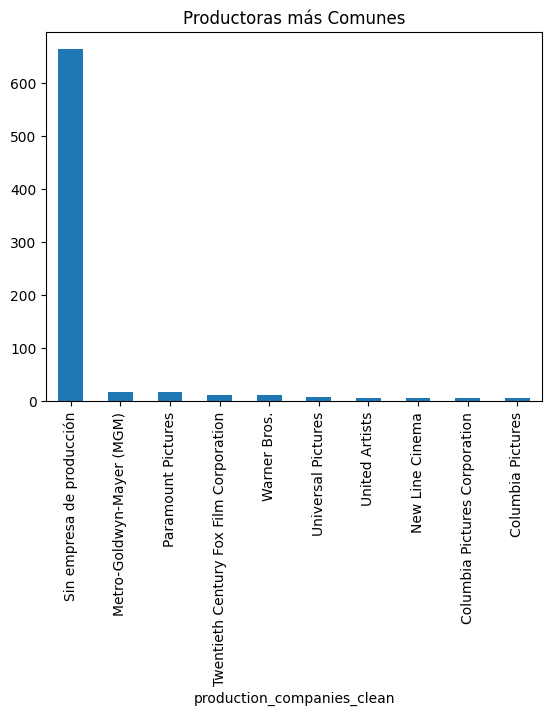

In [193]:
# dado que contamos con pocos datos en las empresas de produccion no se las va a considerar
df_completo['production_companies_clean'].value_counts().head(10).plot(kind='bar', title="Productoras más Comunes")
plt.show()

In [194]:
# Eliminar las columnas 'production_companies_clean' y 'nombre_coleccion'
df_completo = df_completo.drop(columns=['production_companies_clean', 'nombre_coleccion'])

In [195]:
# Calcular el porcentaje de 0s en cada columna relevante, teniendo en cuenta que los pusimos anteriormente para rellenar nulos, dada la salida 'budget' y 'revenue' nos indica que no disponemos de datos basicamente.
for col in ['budget', 'revenue', 'popularity', 'vote_average', 'vote_count']:
    porcentaje_cero = (df_completo[col] == 0).mean() * 100
    print(f"El porcentaje de 0s en la columna '{col}' es: {porcentaje_cero:.2f}%")

El porcentaje de 0s en la columna 'budget' es: 85.25%
El porcentaje de 0s en la columna 'revenue' es: 87.77%
El porcentaje de 0s en la columna 'popularity' es: 0.00%
El porcentaje de 0s en la columna 'vote_average' es: 4.85%
El porcentaje de 0s en la columna 'vote_count' es: 4.65%


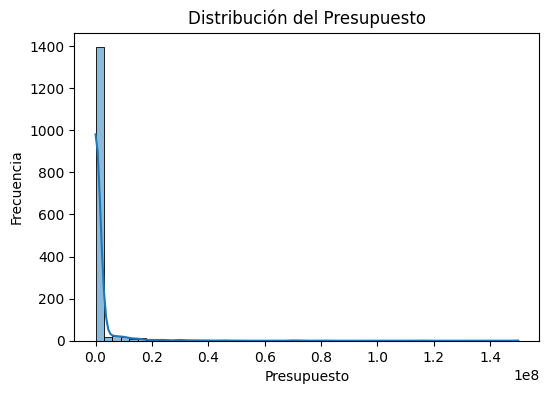

In [196]:
# Cambiar el backend de matplotlib a inline para Jupyter Notebook
%matplotlib inline 
import matplotlib.pyplot as plt

# Distribución del presupuesto
plt.figure(figsize=(6, 4))
sns.histplot(df_completo['budget'], bins=50, kde=True)
plt.title('Distribución del Presupuesto')
plt.xlabel('Presupuesto')
plt.ylabel('Frecuencia')
plt.show()

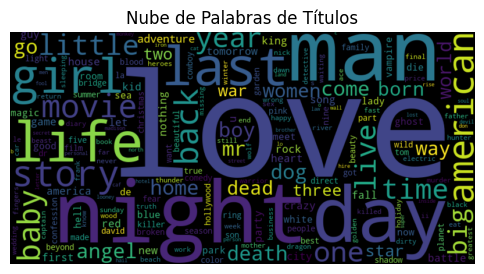

In [197]:
# las palabras más usada en los titulos
wordcloud = WordCloud(width=800, height=400).generate(" ".join(df_completo['title'].dropna()))
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Títulos')
plt.show()

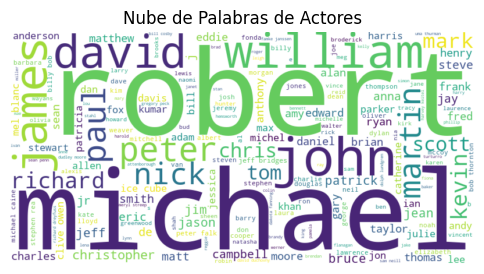

In [198]:
df_actor = pd.read_parquet(r'..\Datasets\actor_dataset.parquet')
# Combina todos los nombres de actores en una sola cadena
text_actors = " ".join(df_actor['actor_name'].dropna())

# Genera la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_actors)

# Muestra la nube de palabras
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Actores')
plt.show()
# tenemos a john como el actor que mas se repite y es el que mas filmaciones tiene

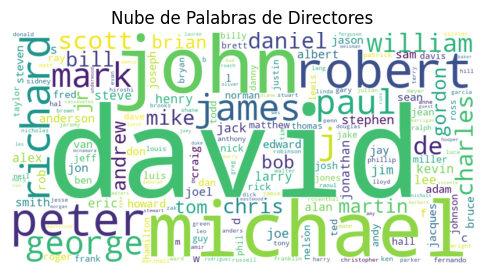

In [199]:
# Combina todos los nombres de directores en una sola cadena
df_director = pd.read_parquet(r'..\Datasets\director_dataset.parquet')
text_directors = " ".join(df_director['director_name'].dropna())

# Genera la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_directors)

# Muestra la nube de palabras
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Directores')
plt.show()

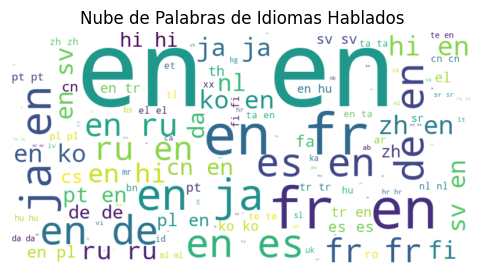

In [200]:
# Combina todos los idiomas en una sola cadena, el ingles y el frances son los mas mencionados, por eso usamos el idioma inglés como criterio para el filtrado de peliculas
df_idioma = pd.read_parquet(r'..\Datasets\datasetmovies_reducido.parquet')
text_languages = " ".join(df_idioma['original_language'].dropna())

# Genera la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_languages)

# Muestra la nube de palabras
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Idiomas Hablados')
plt.show()

In [201]:
# Verificar cantidad de títulos únicos para ver con cuánta información se dispone
num_unique_titles = df_completo['title'].nunique()
print(f"Cantidad de títulos únicos: {num_unique_titles}")

Cantidad de títulos únicos: 1505


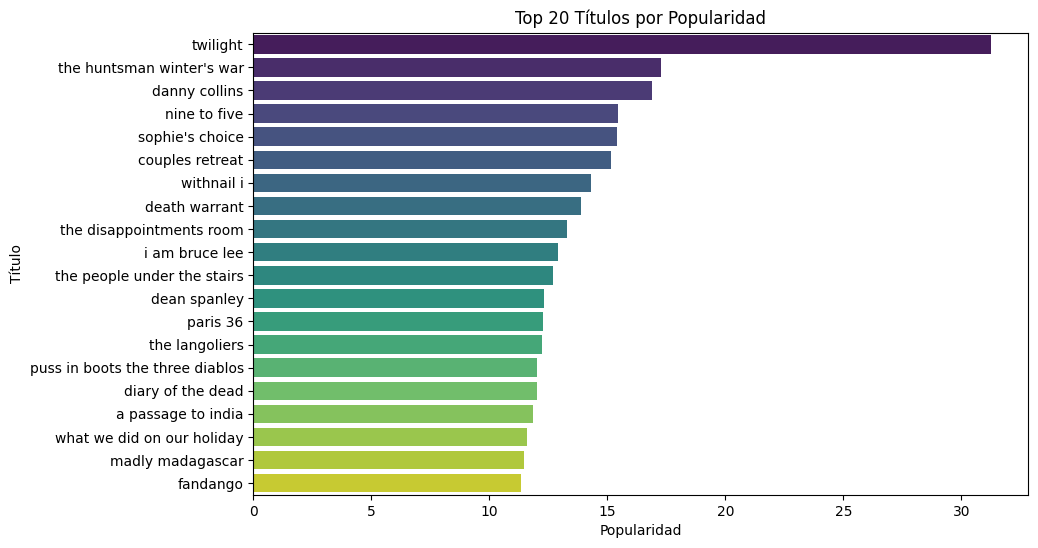

In [202]:
# Ordenar la distribución de titulos por popularidad
df_sorted = df_completo[['title', 'popularity']].sort_values(by='popularity', ascending=False)

# Seleccionar los Top 20 títulos más populares para una visualización más clara
top_n = 20
df_top_n = df_sorted.head(top_n)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='popularity', y='title', data=df_top_n, palette='viridis')
plt.title(f"Top {top_n} Títulos por Popularidad")
plt.xlabel("Popularidad")
plt.ylabel("Título")
plt.show()


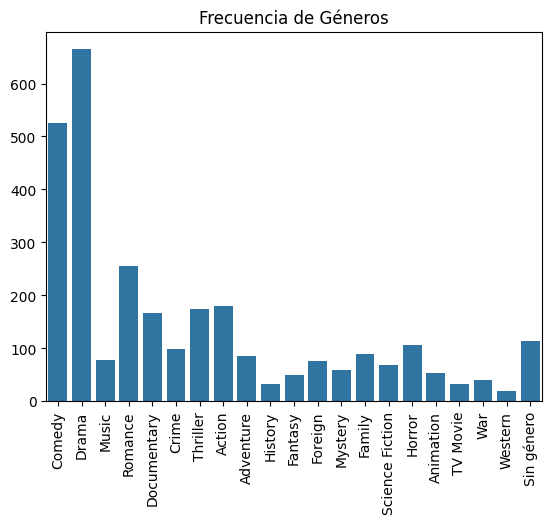

In [203]:
# Dividir la columna de géneros (si es una lista), los generos mas frecuentes son drama, comedia y romance
df_completo['generos'] = df_completo['generos'].str.split(',')

# Explorar la frecuencia de géneros
from collections import Counter
generos_flat = [item.strip() for sublist in df_completo['generos'].dropna() for item in sublist]
generos_counter = Counter(generos_flat)

# Mostrar los géneros más comunes
sns.barplot(x=list(generos_counter.keys()), y=list(generos_counter.values()))
plt.xticks(rotation=90)
plt.title("Frecuencia de Géneros")
plt.show()


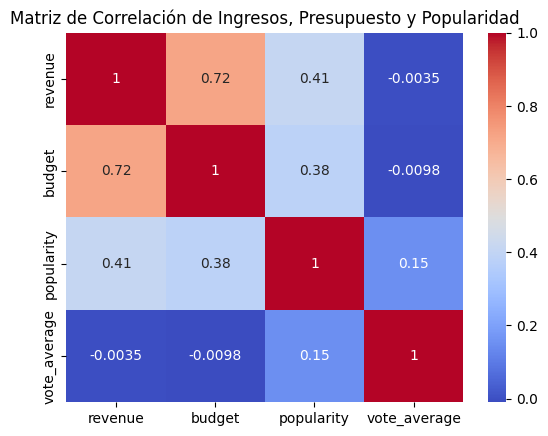

In [204]:
# Correlación entre Revenue, Budget y Popularity
# señal de que las películas con altos presupuestos tienden a tener más éxito financiero,
correlation_matrix = df_completo[['revenue', 'budget', 'popularity', 'vote_average']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación de Ingresos, Presupuesto y Popularidad")
plt.show()

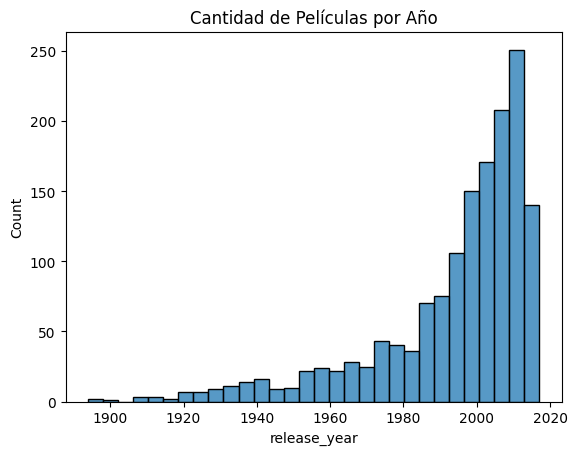

In [205]:
# Convertir a año
df_completo['release_year'] = pd.to_datetime(df_completo['release_date'], errors='coerce').dt.year

# Ver distribución por año de lanzamiento
sns.histplot(df_completo['release_year'], kde=False, bins=30)
plt.title("Cantidad de Películas por Año")
plt.show()


In [206]:
# Filtrar películas lanzadas a partir de 1980
df_post_1980 = df_completo[df_completo['release_year'] >= 1980]

# Contar cuántas películas tienes desde 1980
num_peliculas_post_1980 = df_post_1980.shape[0]
print(f"Cantidad de películas lanzadas a partir de 1980: {num_peliculas_post_1980}")
# Mostrar las primeras filas del DataFrame filtrado
df_post_1980.head(5)

Cantidad de películas lanzadas a partir de 1980: 1218


,title,generos,budget,revenue,vote_count,popularity,vote_average,release_date,release_year,original_language
269,bollywoodhollywood,"[Comedy, Drama, Music, Romance]",0.0,0.0,4.0,2.015731,6.1,2002-01-01,2002,en
891,born into brothels,[Documentary],350000.0,3515061.0,61.0,2.962370,6.7,2004-12-08,2004,en
993,what's eating gilbert grape,"[Romance, Drama]",11000000.0,10032765.0,943.0,10.391900,7.5,1993-12-17,1993,en
1015,still crazy,"[Comedy, Music]",0.0,0.0,35.0,11.089962,7.1,1998-10-30,1998,en
1113,the big one,[Documentary],0.0,720074.0,24.0,2.238505,6.2,1997-09-06,1997,en


In [207]:
df_completo.head(5)

,title,generos,budget,revenue,vote_count,popularity,vote_average,release_date,release_year,original_language
269,bollywoodhollywood,"[Comedy, Drama, Music, Romance]",0.0,0.0,4.0,2.015731,6.1,2002-01-01,2002,en
891,born into brothels,[Documentary],350000.0,3515061.0,61.0,2.962370,6.7,2004-12-08,2004,en
936,get carter,"[Crime, Thriller]",1814462.0,0.0,122.0,7.505268,6.9,1971-03-03,1971,en
993,what's eating gilbert grape,"[Romance, Drama]",11000000.0,10032765.0,943.0,10.391900,7.5,1993-12-17,1993,en
1015,still crazy,"[Comedy, Music]",0.0,0.0,35.0,11.089962,7.1,1998-10-30,1998,en


In [208]:
# Convertir las listas de géneros en cadenas de texto separadas por comas, sacar corchetes
df_completo['generos'] = df_completo['generos'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

In [209]:
# Guardar el dataset en formato Parquet
df_completo.to_parquet(r'..\Datasets\dataset_completo.parquet')

In [210]:
df_actor = pd.read_parquet(r'..\Datasets\actor_dataset.parquet')
df_actor.head(5) # para automatizar el proceso elaboramos ddatasets específicos para cada endpoint

,actor_name,title,revenue,budget,return
269,rahul khanna,bollywoodhollywood,0.0,0.0,0.00000
891,zana briski,born into brothels,3515061.0,350000.0,10.04303
936,michael caine,get carter,0.0,1814462.0,0.00000
993,johnny depp,what's eating gilbert grape,10032765.0,11000000.0,0.91207
1015,stephen rea,still crazy,0.0,0.0,0.00000


In [211]:
df_director = pd.read_parquet(r'..\Datasets\director_dataset.parquet')
df_director.head(5)

,director_name,title,release_date,revenue,budget,return
269,deepa mehta,bollywoodhollywood,2002-01-01,0.0,0.0,0.00000
891,zana briski,born into brothels,2004-12-08,3515061.0,350000.0,10.04303
936,mike hodges,get carter,1971-03-03,0.0,1814462.0,0.00000
993,lasse hallström,what's eating gilbert grape,1993-12-17,10032765.0,11000000.0,0.91207
1015,brian gibson,still crazy,1998-10-30,0.0,0.0,0.00000


In [212]:
df_filmaciones = pd.read_parquet(r'..\Datasets\filmaciones.parquet')
df_filmaciones.tail(5)

,title,release_date
45113,lost in florence,2017-01-27
45252,dave chappelle deep in the heart of texas,2017-03-21
45322,maria bamford old baby,2017-05-02
45324,hickok,2017-07-07
45348,feed,2017-07-18


In [213]:
df_score = pd.read_parquet(r'..\Datasets\score_titulo.parquet')
df_score.tail(5)

,title,release_date,vote_average,popularity
45113,lost in florence,2017-01-27,4.6,1.125783
45252,dave chappelle deep in the heart of texas,2017-03-21,8.0,2.162462
45322,maria bamford old baby,2017-05-02,6.4,0.846929
45324,hickok,2017-07-07,5.0,2.747249
45348,feed,2017-07-18,7.3,4.207731


In [214]:
df_votos = pd.read_parquet(r'..\Datasets\votos_titulo.parquet')
df_votos.tail(5)

,title,vote_count,vote_average,release_year
45113,lost in florence,10.0,4.6,2017.0
45252,dave chappelle deep in the heart of texas,38.0,8.0,2017.0
45322,maria bamford old baby,5.0,6.4,2017.0
45324,hickok,9.0,5.0,2017.0
45348,feed,50.0,7.3,2017.0
